In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def target_density(x):
    return np.exp(-0.5 * x**2)

In [4]:
def metropolis_hastings(start, iterations, proposal_std):
    samples = []
    x = start
    for _ in range(iterations):
        y = x + np.random.normal(0, proposal_std)  # Proposal step
        alpha = min(1, target_density(y) / target_density(x))  # Acceptance ratio
        if np.random.rand() < alpha:
            x = y  # Accept
        samples.append(x)
    return np.array(samples)

In [5]:
np.random.seed(0)
samples = metropolis_hastings(start=0, iterations=10000, proposal_std=1.0)

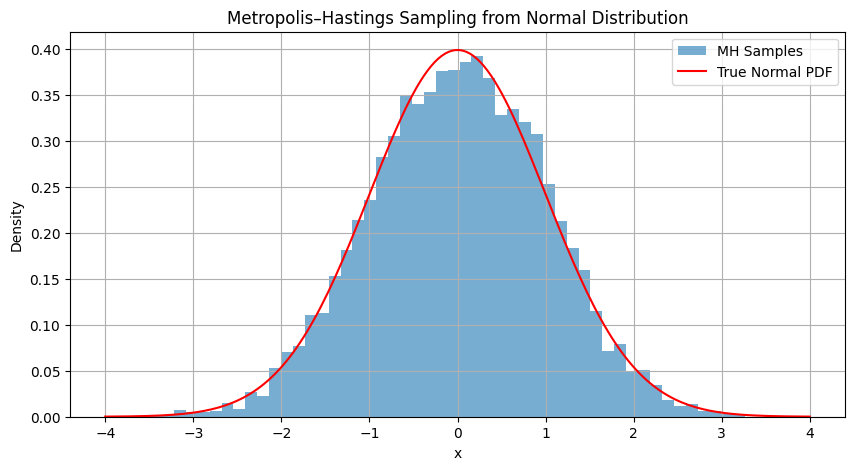

In [6]:
plt.figure(figsize=(10,5))
plt.hist(samples, bins=50, density=True, alpha=0.6, label='MH Samples')
x_vals = np.linspace(-4, 4, 200)
plt.plot(x_vals, (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x_vals**2), label='True Normal PDF', color='red')
plt.legend()
plt.title('Metropolis–Hastings Sampling from Normal Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.show()

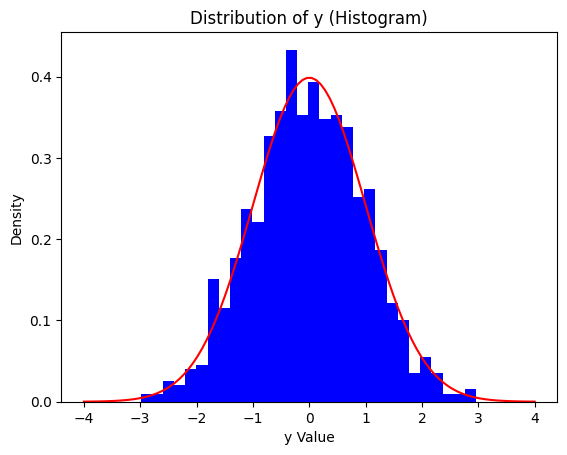

In [17]:
y = np.random.normal(0, 1, 1000)
x = np.linspace(-4, 4, 100)
y_pdf = 1/(np.sqrt(2*np.pi)) * np.exp(-x**2/2)
plt.plot(x, y_pdf, color='red')
plt.hist(y, bins=30, density=True, color='blue')
plt.xlabel('y Value')
plt.ylabel('Density')
plt.title('Distribution of y (Histogram)')
plt.show()

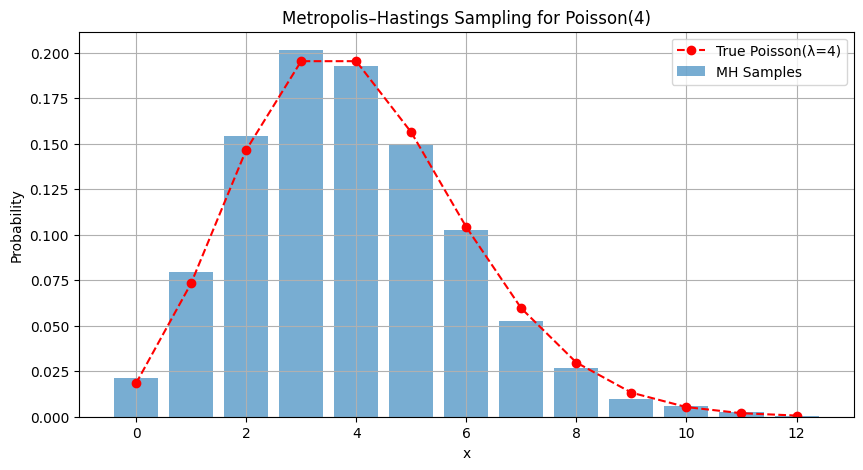

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Target (unnormalized) Poisson density
def unnormalized_poisson(x, lam=4):
    if x < 0:
        return 0
    return (lam**x) / math.factorial(x)

# Metropolis-Hastings for Poisson(λ)
def mh_poisson(lam=4, steps=10000, x0=2):
    x = x0
    samples = [x]

    for _ in range(steps):
        # Propose y = x + 1 or x - 1
        proposal = x + np.random.choice([-1, 1])

        # Compute alpha
        num = unnormalized_poisson(proposal, lam)
        den = unnormalized_poisson(x, lam)
        alpha = min(1, num / den)

        # Accept or reject
        u = np.random.rand()
        if u < alpha:
            x = proposal
        samples.append(x)

    return samples

# Run sampler
samples = mh_poisson(steps=10000, x0=0)

# Compare histogram with true Poisson
counts = np.bincount(samples)
x_vals = np.arange(len(counts))
true_probs = [np.exp(-4) * (4**x) / math.factorial(x) for x in x_vals]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(x_vals, counts / np.sum(counts), alpha=0.6, label='MH Samples')
plt.plot(x_vals, true_probs, 'r--', label='True Poisson(λ=4)', marker='o')
plt.title("Metropolis–Hastings Sampling for Poisson(4)")
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.show()


In [23]:
counts

array([ 211,  795, 1544, 2015, 1928, 1501, 1025,  526,  269,   99,   58,
         24,    6])

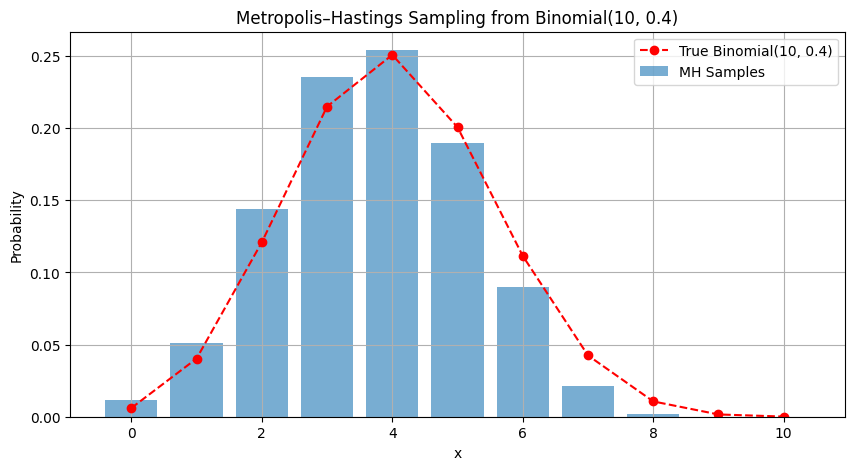

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Unnormalized binomial PMF
def unnormalized_binomial(x, n=10, p=0.4):
    if x < 0 or x > n:
        return 0
    return math.comb(n, x) * (p**x) * ((1 - p)**(n - x))

# MH sampler
def mh_binomial(n=10, p=0.4, steps=10000, x0=5):
    x = x0
    samples = [x]

    for _ in range(steps):
        y = x + np.random.choice([-1, 1])
        if y < 0 or y > n:
            samples.append(x)
            continue

        num = unnormalized_binomial(y, n, p)
        den = unnormalized_binomial(x, n, p)
        alpha = min(1, num / den)

        u = np.random.rand()
        if u < alpha:
            x = y
        samples.append(x)

    return samples

# Run the sampler
samples = mh_binomial(n=10, p=0.4, steps=5000, x0=0)

# Compare with true binomial
counts = np.bincount(samples, minlength=11)
x_vals = np.arange(0, 11)
true_probs = [math.comb(10, x) * (0.4**x) * (0.6**(10 - x)) for x in x_vals]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(x_vals, counts / np.sum(counts), alpha=0.6, label='MH Samples')
plt.plot(x_vals, true_probs, 'r--o', label='True Binomial(10, 0.4)')
plt.title("Metropolis–Hastings Sampling from Binomial(10, 0.4)")
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.show()
